# Banking Use Case : Predicting EMI Loan Default using Financial Records

- Independant Features: 'job', 'marital', 'education', 'housing', 'loan', 'poutcome'

- Target Variable: 'default'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,auc

In [2]:
df = pd.read_csv('C:/Users/Abhishek Benjamin/Desktop/Download -2/Statistics/Learnbay Data Set/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
df.shape

(11162, 17)

In [5]:
round(df.isnull().sum()/len(df)*100,2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
print(round(df[df.default== 0].shape[0]/df.shape[0]*100,2))
print(round(df[df.default== 1].shape[0]/df.shape[0]*100,2))

0.0
0.0


# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
encode = LabelEncoder()

df['job'] = encode.fit_transform(df['job'])
df['marital'] = encode.fit_transform(df['marital'])
df['education'] = encode.fit_transform(df['education'])
df['housing'] = encode.fit_transform(df['housing'])
df['loan'] = encode.fit_transform(df['loan'])
df['poutcome'] = encode.fit_transform(df['poutcome'])

df['default'] = encode.fit_transform(df['default'])

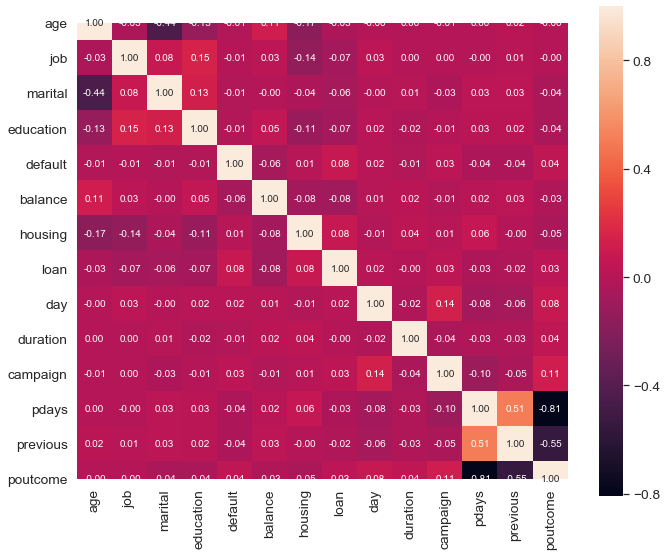

In [18]:
plt.subplots(figsize=(11,9))
sb.heatmap(df.corr(),annot=True,square=True, fmt='.2f', annot_kws={'size': 10}, cbar=True)
                 

# Bifurcation into Dependant and Independant Var

In [14]:
X = df[['job','marital','education','housing','loan','poutcome']]
Y = df[['default']]

In [15]:
Y.head()

,default
0,0
1,0
2,0
3,0
4,0


# Splitting Data into Train - Test Split

In [16]:
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size =0.2)

# Decision Tree Building

In [40]:
dt_2 = DecisionTreeClassifier(random_state=1,criterion = 'gini', max_depth = 2)
                              
dt_2.fit(x_train,y_train)
dt_2_train_score = dt_2.score(x_train,y_train)
dt_2_test_score = dt_2.score(x_test,y_test)

print('Training Score:',dt_2_train_score*100)
print('Testing Score:',dt_2_test_score*100)

Training Score: 98.54406988464554
Testing Score: 98.29825347066726


In [44]:
y_pred_dt = dt_2.predict_proba(x_test)[:,1]
y_pred_dt

array([0.01442646, 0.01442646, 0.00336215, ..., 0.00336215, 0.01442646,
       0.00336215])

# Performance Metrics for Model Evaluation

In [45]:
fpr_dt,tpr_dt, _ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

### Area under Curve (AUC)

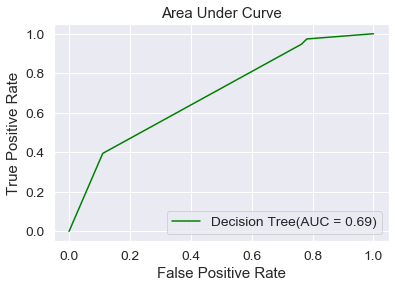

In [58]:

plt.plot(fpr_dt, tpr_dt, color='green',
          label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")

# Confusion Matrix

In [60]:
prediction = dt_2.predict(x_test)

In [61]:
print(confusion_matrix(y_test,prediction))

[[2195    0]
 [  38    0]]


In [63]:
print(accuracy_score(y_test,prediction)*100)

98.29825347066726


# GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
dt_grid = DecisionTreeClassifier(random_state = 42)

# criterion,max_depth, min_samples_split, min_samples_leaf 

In [72]:
param_dist = {'criterion':['gini','entropy'],
             'max_depth':[2,4,8],
             'min_samples_split':[2,4,8],
             'min_samples_leaf': list(range(1,16))}

dt_tuned = GridSearchCV(dt_grid, cv = 10, param_grid= param_dist, n_jobs = 3 ) 

dt_tuned.fit(x_train, y_train)

print('Best Parameters using Grid search:', dt_tuned.best_params_) 

Best Parameters using Grid search: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [73]:
print(dt_tuned.best_score_)

0.9854406988464554
